EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [4]:
df = pd.read_csv("cars-dataset.csv",na_values='?')  

In [8]:
df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [6]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [7]:
df.columns[df.isna().any() == True] # to check missing values in columns

Index(['hp'], dtype='object')

There are missing values in 'hp' column

In [12]:
df1 = df.dropna()


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

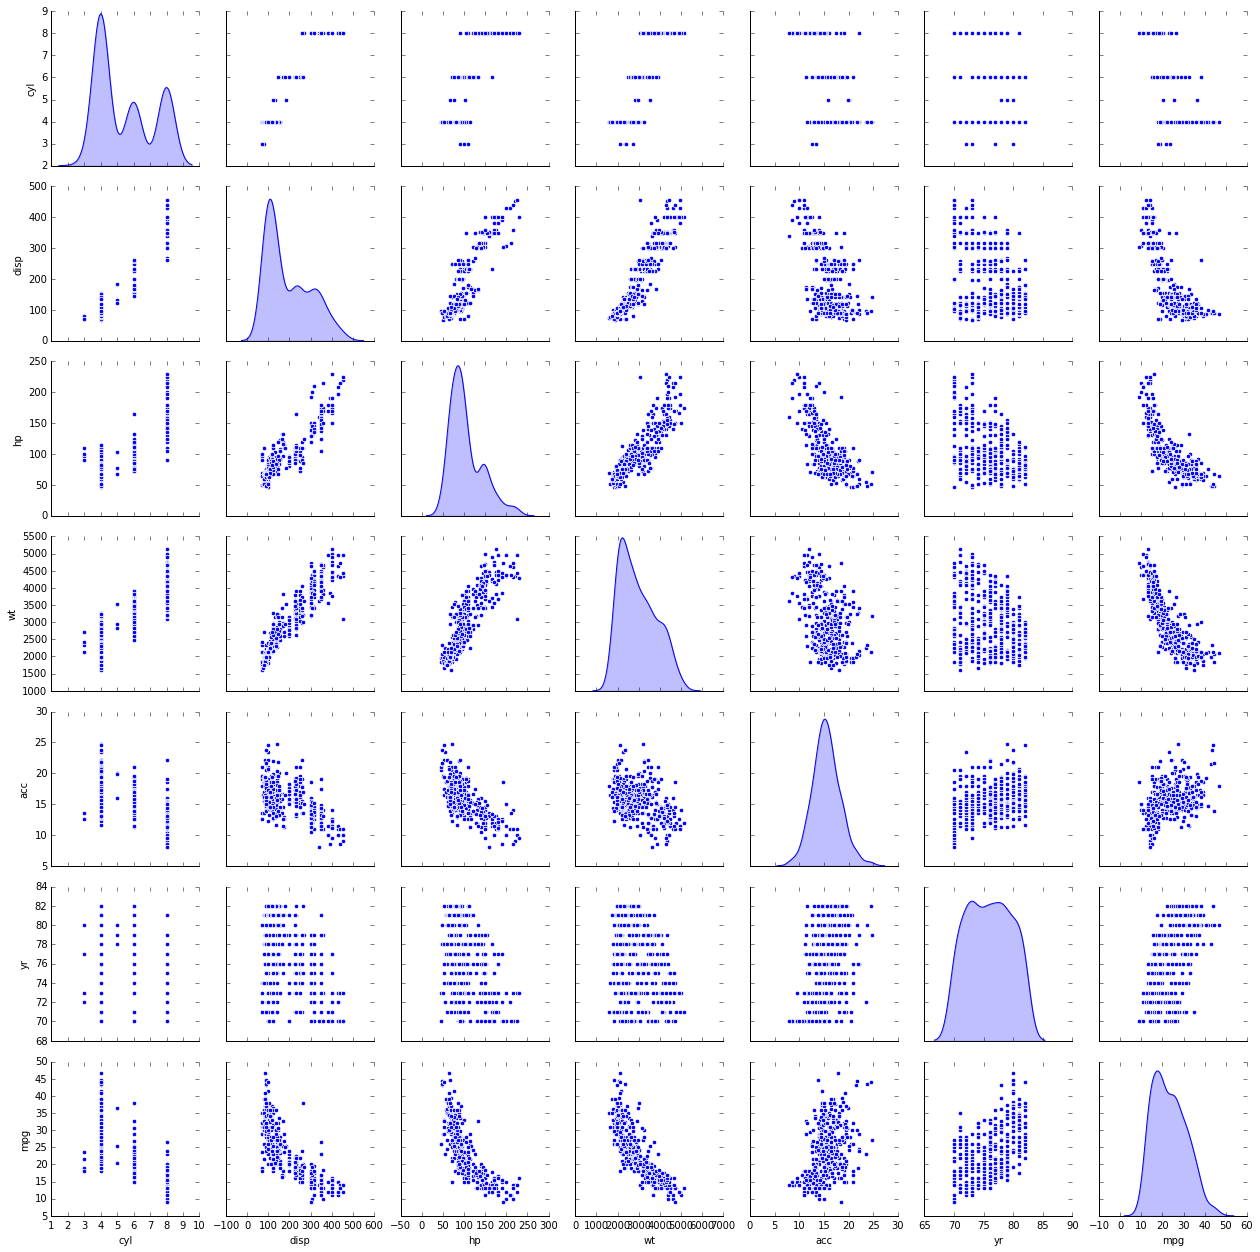

In [14]:
sns.pairplot(df1, diag_kind='kde') 

>>> Since cyl column has 3 modes, disp column 3 modes and hp column has 2 modes, the number of clusters may be 3 (incase the clusters overlap) to 3 * 3 = 9 clusters.



Now we need to standardize the data in order to avoid any issues related to dimensions.

In [19]:
df2 = df1.drop(['car name'],axis=1)
df_z= df2.apply(zscore)
df_z.sample(5)

,cyl,disp,hp,wt,acc,yr,mpg
329,-0.864014,-0.989490,-0.974698,-1.329199,-0.631982,1.092789,2.713785
316,0.309967,0.292679,-0.376395,0.475548,1.146381,1.092789,-0.557523
148,-0.864014,-0.750279,-0.766593,-0.862393,-0.559396,-0.538074,0.327654
317,-0.864014,-0.932079,-0.688553,-0.930764,0.093881,1.092789,1.392433
177,-0.864014,-0.759847,-0.246329,-0.334290,-0.196464,-0.266263,-0.057205


In [20]:
df_z.shape

(392, 7)

In [23]:
df_z= df_z[(df_z > -3) & (df_z < 3)].dropna() # dropping the outlier if any

In [24]:
df_z.shape

(385, 7)

Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [27]:
#Now we need to plot elbow plot to determine the optimal value of K

distortion = []

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
cluster_range=range(2,10)               
cluster_sil_scores = []

In [28]:
#Finding optimal no. of clusters

for k in cluster_range:
    clusters=KMeans(n_clusters=k , random_state=1)
    clusters.fit(df_z)
    prediction=clusters.predict(df_z)
    distortion.append( clusters.inertia_ )
    labels = clusters.labels_                     
    centroids = clusters.cluster_centers_         
    cluster_sil_scores.append(metrics.silhouette_score(df_z, labels, metric='euclidean'))

In [29]:
df_cluster = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion , "Avg Sil Score": cluster_sil_scores } )
df_cluster.head(10)

,num_clusters,distortion,Avg Sil Score
0,2,1204.824514,0.454906
1,3,873.749839,0.357003
2,4,673.618829,0.354160
3,5,606.153798,0.316932
4,6,546.704768,0.278717
5,7,496.835191,0.279842
6,8,452.962095,0.267495
7,9,415.768744,0.268032


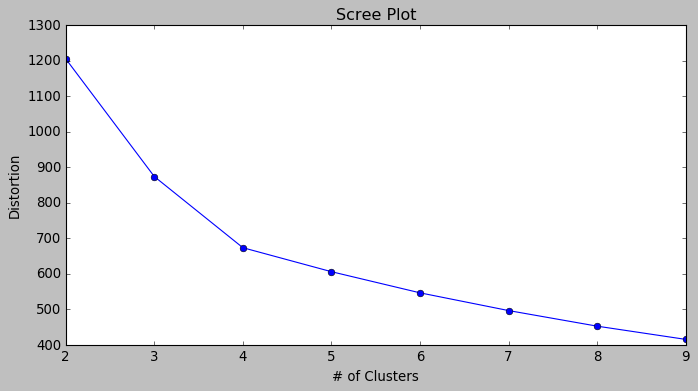

In [34]:
#Plotting Elbow Plot


plt.figure(figsize=(10,5))
plt.title('Scree Plot')
plt.xlabel('# of Clusters')
plt.ylabel('Distortion')
plt.plot( df_cluster.num_clusters, df_cluster.distortion, marker = "o" )

We choose the Value of K as 4 since we see the highest drop at 4

In [36]:
clusters=KMeans(n_clusters=4 , random_state=1)
clusters.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [37]:
#Using optimal value of K - Cluster the data.

clusters.cluster_centers_

array([[ 0.40230226,  0.28751848, -0.04845337,  0.32576022,  0.3055226 ,
         0.0391417 , -0.48862314],
       [-0.83140299, -0.79200793, -0.74949159, -0.79099938,  0.32508132,
         1.10537262,  1.19442058],
       [ 1.48394702,  1.43589274,  1.40839908,  1.38317324, -1.01144655,
        -0.63169726, -1.14821171],
       [-0.87000325, -0.8139871 , -0.56061084, -0.76140124,  0.32978598,
        -0.63237525,  0.21193472]])

In [39]:
pd.DataFrame(clusters.cluster_centers_, columns=df2.columns).T

,0,1,2,3
cyl,0.402302,-0.831403,1.483947,-0.870003
disp,0.287518,-0.792008,1.435893,-0.813987
hp,-0.048453,-0.749492,1.408399,-0.560611
wt,0.325760,-0.790999,1.383173,-0.761401
acc,0.305523,0.325081,-1.011447,0.329786
yr,0.039142,1.105373,-0.631697,-0.632375
mpg,-0.488623,1.194421,-1.148212,0.211935


In [41]:
df_z['cluster'] = clusters.labels_
df_z.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg,cluster
118,-0.864014,-0.750279,-0.766593,-0.966128,-0.014999,-0.809884,0.071081,3
141,-0.864014,-0.922511,-0.558487,-0.894221,0.347933,-0.538074,0.712514,3
365,0.309967,0.053468,-0.428421,0.097152,0.565691,1.364599,-0.416408,0
134,0.309967,0.608437,0.143869,0.771427,0.892329,-0.538074,-0.955212,0
312,-0.864014,-1.037332,-1.026725,-1.129982,0.311639,1.092789,1.764465,1
387,0.309967,0.646711,-0.506461,0.044106,0.529398,1.636410,1.867094,1
81,-0.864014,-0.932079,-0.324369,-0.812884,0.529398,-1.081695,0.584228,3
188,1.483947,1.182542,1.184397,1.429199,-0.922327,0.005547,-0.955212,2
86,1.483947,1.048584,1.184397,0.818579,-1.466724,-0.809884,-1.211785,2
343,-0.864014,-1.104311,-1.208817,-1.441185,0.493105,1.364599,2.008209,1


In [42]:
df_z['cluster'].value_counts()

1    108
3     98
2     90
0     89
Name: cluster, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016F2A128>,
      dtype=object)

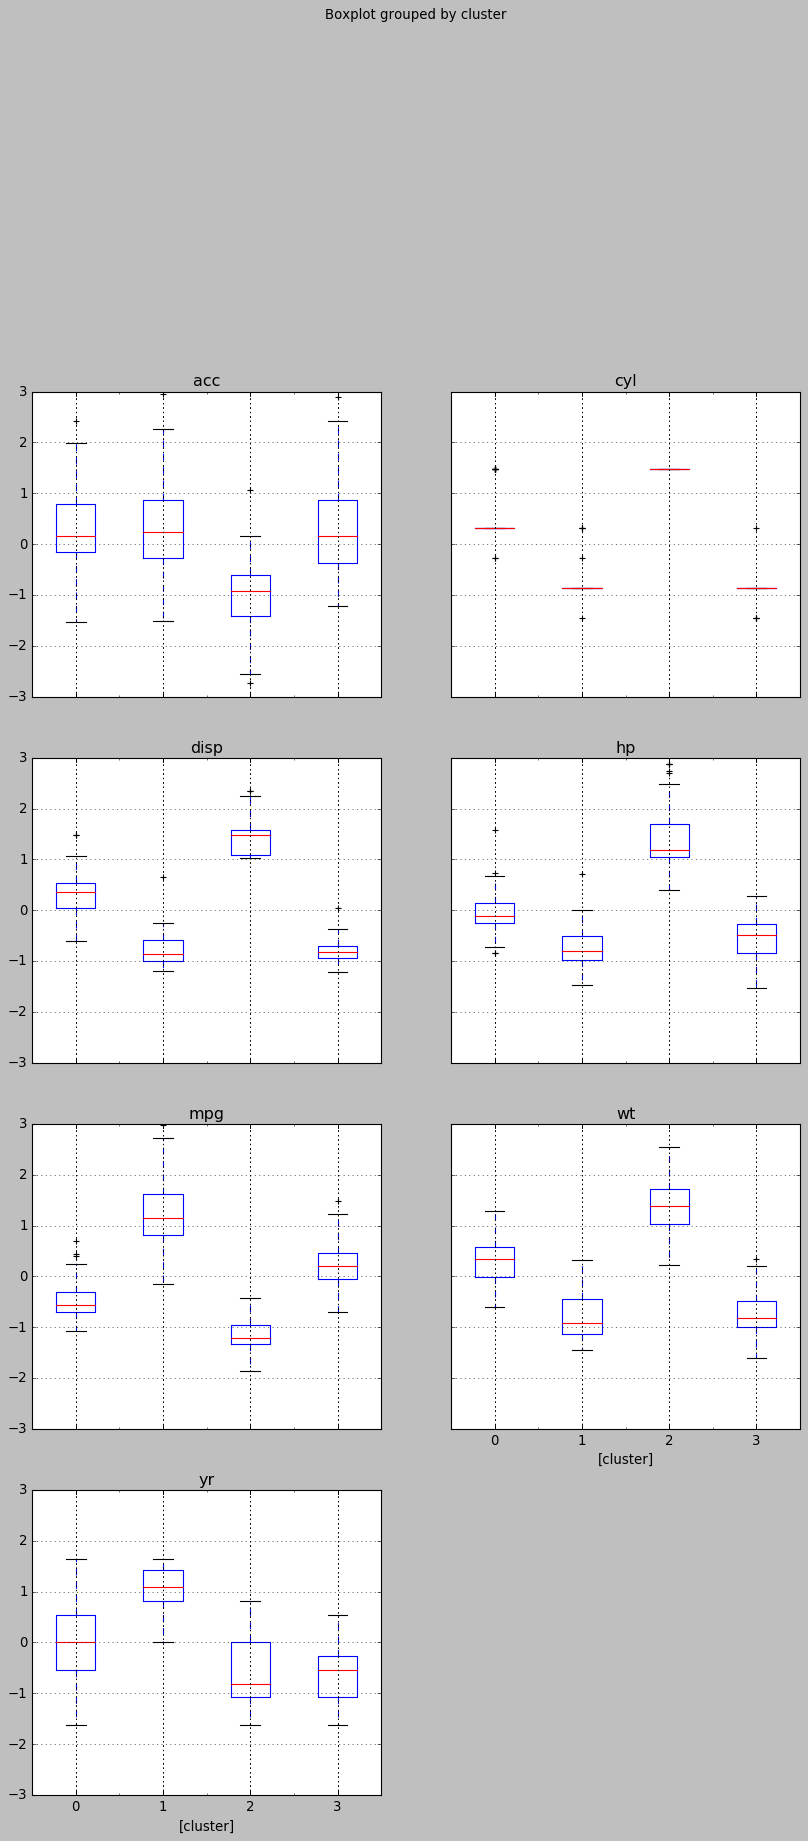

In [43]:
df_z.boxplot(by = 'cluster',  layout=(10,2), figsize=(12, 60))

In [ ]:
Observations
•Cluster 1 has the cars with highest mpg  and relatively lower weight, low hp, cyl and disp
•Cluster 2 has the cars with lowest mpg , and highest wt, hp, cyl and disp 
•Cluster 0,3 are lying between clusters 1 and 2, following similar trends as 1 and 2 where 3 is having higher mpg than 0 and correspondingly having lower weight, hp, cyl and disp than 0


Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [46]:
# Adding cluster to our original cleaned df
df3 = df1.join(df_z['cluster'], on=df1.index).dropna()
df3.shape

(385, 9)

In [47]:
df3.sample(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg,cluster
131,toyota corolla 1200,4,71.0,65.0,1836,21.0,74,32.0,3.0
376,mazda glc custom l,4,91.0,68.0,2025,18.2,82,37.0,1.0
182,fiat 131,4,107.0,86.0,2464,15.5,76,28.0,3.0
364,oldsmobile cutlass ls,8,350.0,105.0,3725,19.0,81,26.6,0.0
237,chevrolet chevette,4,98.0,63.0,2051,17.0,77,30.5,1.0


In [49]:
df3['cluster'].value_counts()

1.0    108
3.0     98
2.0     90
0.0     89
Name: cluster, dtype: int64

In [50]:
cluster_list = df3.cluster.unique()
cluster_list

array([2., 3., 0., 1.])

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
for i in cluster_list:
    print("\n\n\nFor cluster: ",i)
    cluster_df = df3[df3['cluster'] == i]

    X = cluster_df.drop(['car name','mpg','cluster'], axis=1) #independent variables
    y = cluster_df[['mpg']]    #Dependent Variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
    regression_model = LinearRegression() 
    regression_model.fit(X_train, y_train)
    print("Respective coefs")
    print(pd.DataFrame(regression_model.coef_[0],X_train.columns))
    print("\nModel Intercepts: ", regression_model.intercept_[0])
    print("\nModel Score: ", regression_model.score(X_test, y_test))




For cluster:  2.0
Respective coefs
             0
cyl   0.000000
disp -0.000507
hp   -0.026821
wt   -0.001283
acc  -0.451685
yr    0.375012

Model Intercepts:  2.406949354533058

Model Score:  0.27161820171865236



For cluster:  3.0
Respective coefs
             0
cyl   4.053545
disp -0.052900
hp   -0.058494
wt   -0.004233
acc  -0.312367
yr    0.372775

Model Intercepts:  7.120944624709605

Model Score:  0.560320285606696



For cluster:  0.0
Respective coefs
             0
cyl   1.011188
disp  0.001387
hp   -0.019800
wt   -0.003927
acc   0.018813
yr    0.484986

Model Intercepts:  -9.317646060629777

Model Score:  0.42000531588133394



For cluster:  1.0
Respective coefs
             0
cyl   3.690330
disp  0.005474
hp   -0.138574
wt   -0.007863
acc   0.115122
yr    0.850699

Model Intercepts:  -23.96591247569703

Model Score:  -0.07836251133603866


In [53]:
print("\n\nWithout using clustering we are getting better model score\n")
X = df3.drop(['car name','mpg','cluster'], axis=1)
y = df3[['mpg']]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
regression_model = LinearRegression() 
regression_model.fit(X_train, y_train)
print("Respective coefs")
print(pd.DataFrame(regression_model.coef_[0],X_train.columns))
print("\nModel Intercepts: ", regression_model.intercept_[0])
print("\nModel Score: ", regression_model.score(X_test, y_test)
     )



Without using clustering we are getting better model score

Respective coefs
             0
cyl   0.110173
disp -0.002801
hp   -0.010199
wt   -0.006317
acc  -0.038168
yr    0.740431

Model Intercepts:  -12.371857572003698

Model Score:  0.8035868051998842
